# Define the system  

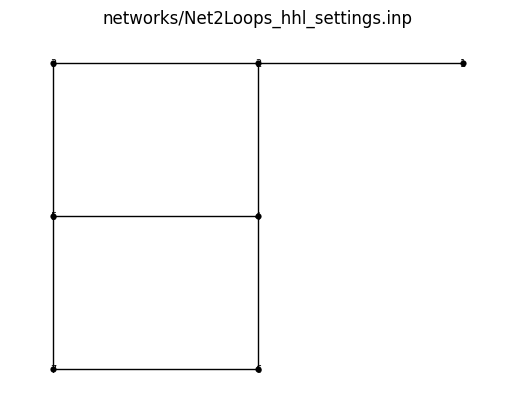

<Axes: title={'center': 'networks/Net2Loops_hhl_settings.inp'}>

In [1]:
import os
import wntr
import wntr_quantum

os.environ["EPANET_TMP"] = "/home/nico/.epanet_quantum"
os.environ["EPANET_QUANTUM"] = "/home/nico/QuantumApplicationLab/vitens/EPANET"

# Create a water network model
# inp_file = 'networks/Net0.inp'
inp_file = 'networks/Net2Loops_hhl_settings.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


## Run with the original simulator

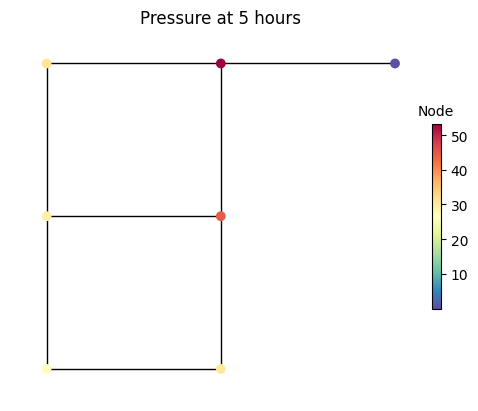

<Axes: title={'center': 'Pressure at 5 hours'}>

In [2]:
# define the classical simulator
sim = wntr.sim.EpanetSimulator(wn)

# run the simulation
results = sim.run_sim()

# Plot results on the network
pressure_at_5hr_ref = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr_ref, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Run with the HHL solver

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so
HHL timing: 31.068329 s.
HHL timing: 31.530130 s.
HHL timing: 68.621765 s.
HHL timing: 64.437107 s.
HHL timing: 56.084545 s.
HHL timing: 51.080409 s.
HHL timing: 52.508506 s.


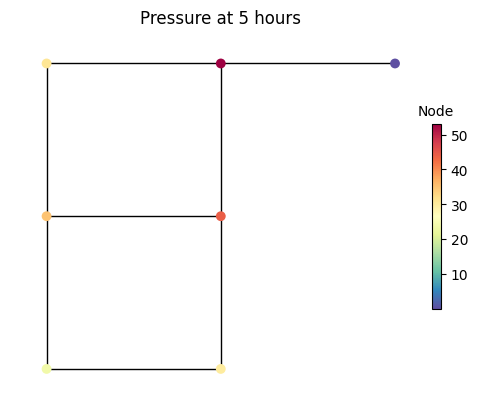

<Axes: title={'center': 'Pressure at 5 hours'}>

In [3]:
from quantum_newton_raphson.hhl_solver import HHL_SOLVER
from qiskit.primitives import Estimator, Sampler


# define the estimator
estimator = Estimator()
sampler = Sampler()

linear_solver = HHL_SOLVER(
    estimator=estimator,
    sampler = sampler,
    epsilon = 1E-3
)


# define the quantum epanet simulator
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn, linear_solver=linear_solver)

# run the simulation
results = sim.run_sim(linear_solver=linear_solver)

# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

## Compare the pressure values obtained

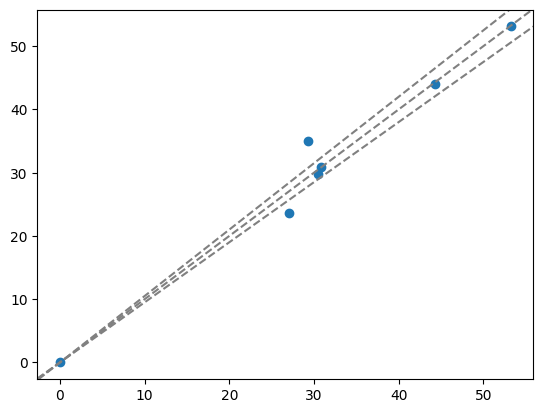

In [4]:
import matplotlib.pyplot as plt 
plt.scatter(pressure_at_5hr_ref.values, pressure_at_5hr.values)
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.axline((0, 0), slope=1.05, linestyle="--", color="gray")
plt.axline((0, 0), slope=0.95, linestyle="--", color="gray")
plt.show()
